In [201]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.patches as mpatches
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
from IPython.display import display, Markdown
pd.set_option('float_format', '{:.2f}'.format)

def mprint(s):
    display(Markdown(s))

df = pd.read_pickle('../dataset/CIC_IDS_2017/CIC_IDS_2017_Monday.pkl')

In [204]:
plots_series = [
    'active_flows:flows_as_client', 
    'active_flows:flows_as_server',
    'contacts:num_as_client', 
    'contacts:num_as_server'
]

def describe_mtimeseries(key, mtimeserie):
    # display(Markdown(f'### {key}'))
    # Data description ..... #
    start = min(mtimeserie.index)
    end = max(mtimeserie.index)
    mprint(f'Data range: {start} / {end} ({(end-start)})')
    mprint(f'Measurements available: {len(mtimeserie)}')
    # Time deltas ..... #
    delta = np.diff(np.sort(mtimeserie.index.values))
    blind_spot = [(i, x_delta) for (i, x_delta) in enumerate(delta)]
    blind_spot = [mtimeserie.index[i:i+2] for i, x_delta in blind_spot]
    blind_spot = list(filter(lambda x: x[1]-x[0] > pd.Timedelta(seconds=15), blind_spot))
    # Description ..... #
    display(mtimeserie.describe())
    # Scaling ..... #
    clean_scaled_ts = mtimeserie - mtimeserie.min()
    clean_scaled_ts /= (mtimeserie.max()-mtimeserie.min())+1e-7
    # Plotting clean data ..... #
    # axes = clean_scaled_ts[plots_series].plot(subplots=True, figsize=(120,17))
    clean_scaled_ts.plot(subplots=True, figsize=(12,150))
    # Plotting blind spots ..... #
    for ax in axes:
        for (bstart, bend) in blind_spot:
            ax.axvspan(bstart, bend, color='grey', alpha=0.5)
            handles, labels = ax.get_legend_handles_labels()
            patch = mpatches.Patch(color='grey', label='Missing')
            handles.append(patch) 
            ax.legend(handles=handles, loc='upper center')
    # Titles and save ..... #
    plt.gcf().suptitle(key, fontsize=24, y=.94)
    plt.savefig(f'{key}.png')
    plt.show()
    
    mprint(f"<br>{'-'*50}<br>{'-'*50}<br>")

# Host Descripiton

Data range: 2020-03-18 16:07:00 / 2020-03-19 00:15:00 (0 days 08:08:00)

Measurements available: 1916

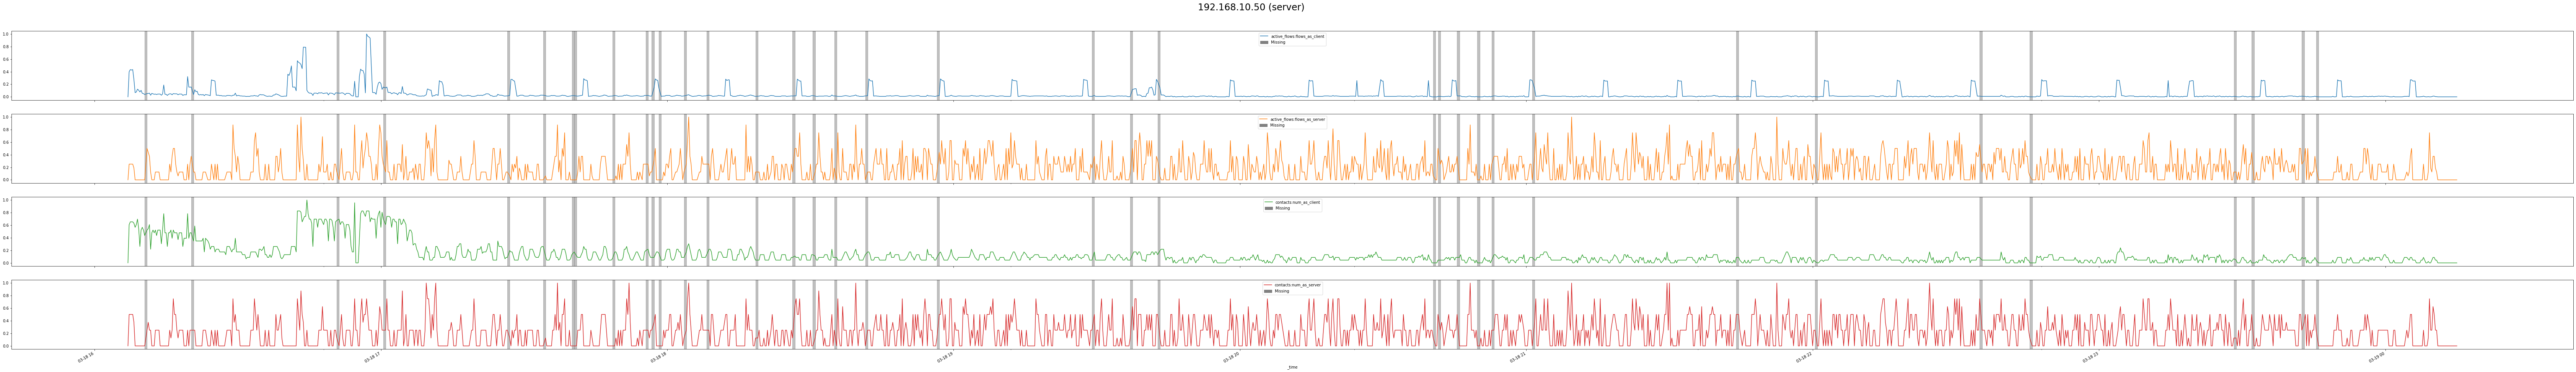

<br>--------------------------------------------------<br>--------------------------------------------------<br>

Data range: 2020-03-18 16:14:30 / 2020-03-19 00:15:00 (0 days 08:00:30)

Measurements available: 1869

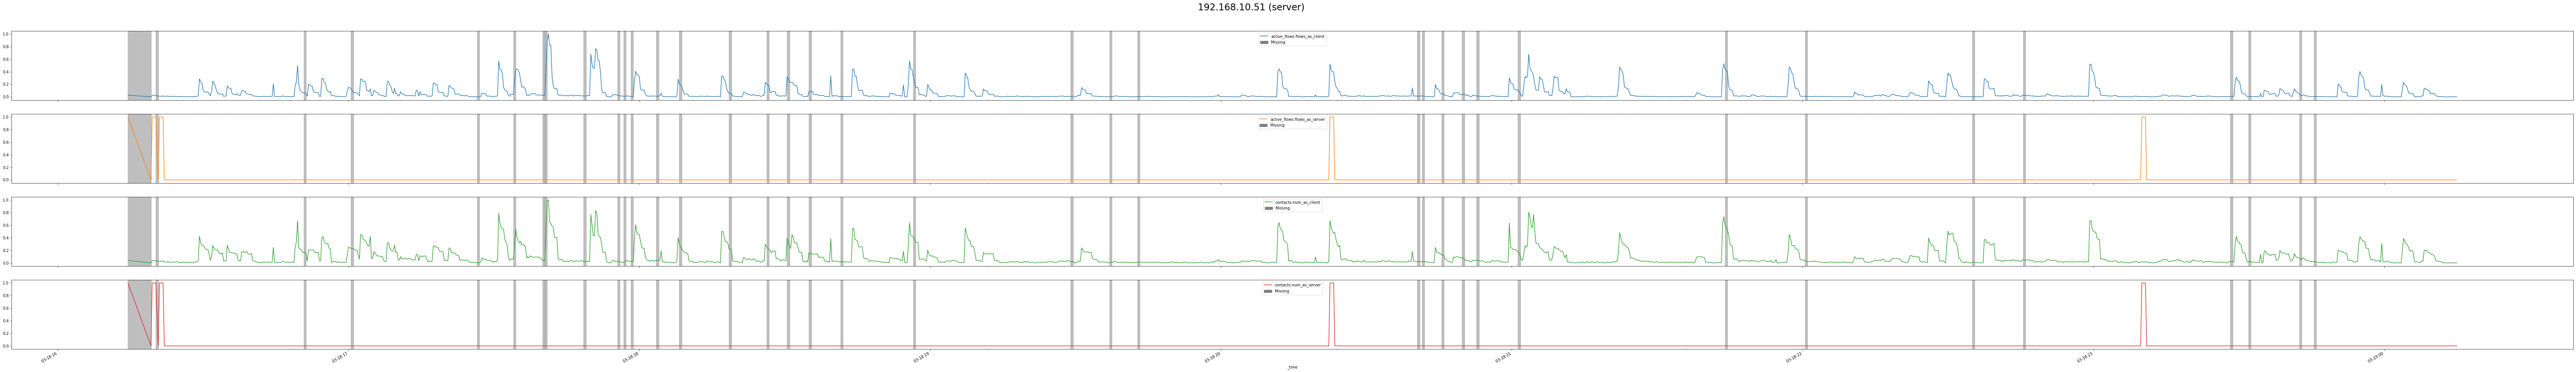

<br>--------------------------------------------------<br>--------------------------------------------------<br>

In [205]:
devices = df.index.droplevel(2).unique()
devices = devices[[-2, -1]]

for device_type, ip in devices:
    host_ts = df.loc[device_type].loc[ip]
    abc = describe_mtimeseries(f'{ip} ({device_type})', host_ts)

# Mean value category description